# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [38]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
#import modelproject
#Denne henviser til modelproject.py - gemmer her, hvis vi vil bruge med vores model og smide noget af det derind. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We are solving a Microeconomics I problem from an exam. Exam 2016 winter, link is in readme and file has been uploaded as .pdf in this project. We are considering problem/exercise 2. 

# Visualization

Consumer theory setup

Utility function:
$u(x_1,x_2)=(x_1x_2+2x_2

The consumption possiblity frontier is: $(x_1,x_2) \in (0, \infty) x (0,\infty)$.

Furthermore we assume: $p_1, p_2, I>0$




We start out by visualizing the consumer's utility:

In [8]:
#Utility function:
def u(x1,x2):
    u = x1*x2+2*x2
    return u

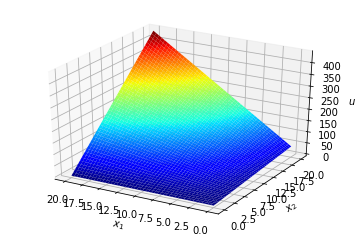

In [9]:
#Vectors:
x1_vec = np.linspace(0, 20, 50)
x2_vec = np.linspace(0, 20, 50)

#Grid:
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec)

#Utility function in grid:
u_grid = u(x1_grid, x2_grid)

#Plot:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=plt.cm.jet, cstride=1, rstride=1)

#Labels:
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.invert_xaxis()


# The consumer's utility maximization problem

We have the following utility max problem:
$max_{x_1,x_2 \geq 0} \:  x_1x_2+2x_2 \: s.t. \: p_1x_1+p_2x_2=I$

In [10]:
#Turning variables to symbolics

x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')

utility = (x1*x2 + 2*x2)
budget_constraint = sm.Eq(p1*x1 + p2*x2, I)

Finding consumers demand for the goods respectively


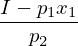

In [11]:
#Solve for x2 in budget constraint
x2constraint = sm.solve(budget_constraint, x2)
x2constraint[0]

Substitute result for x2

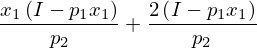

In [12]:
utility_subx2 = utility.subs(x2, x2constraint[0])
utility_subx2

Finding the derivate w.r.t $x_1$ to maximize

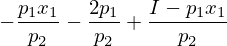

In [13]:
focx1 = sm.diff(utility_subx2, x1)
focx1

As usual this is set equal to zero and solved

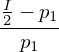

In [14]:
x1solv = sm.solve(sm.Eq(0,focx1),x1)
x1solv[0]

This resultat is substituted into the budget constraint, which then will be an expressing for x2

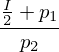

In [15]:
x1constraint = sm.solve(budget_constraint, x1)
utility_subx1 = utility.subs(x1, x1constraint[0])
focx2 = sm.diff(utility_subx1, x2)
x2solv = sm.solve(sm.Eq(focx2, 0), x2)
x2solv[0]

For simplicitiy, we proceed with this solution, which is true for $I>2p_1$, thereby we ignore the corner solutions where $I \leq 2p_1$

 ## Case with values

We set values for prices and income. $p_1=4$, $p_2=1$ and $I=16$. A change in production of the goods causes the price of good 1 to fall to $p_1=1$


In [16]:
#Define results
def x1func(p1,p2,I):
    return (I/2 - p1)/p1

def x2func(p1,p2,I):
    return (I/2 + p1)/p2

In [17]:
#Prices and income are implemented
print('x1 =',x1func(4,1,16))
print('x2 =',x2func(4,1,16))
print('utility =',u(x1func(4,1,16),x2func(4,1,16)))

x1 = 1.0
x2 = 12.0
utility = 36.0


In [18]:
#Case with a fall in price
print('x1 =',x1func(1,1,16))
print('x2 =',x2func(1,1,16))
print('utility =',u(x1func(1,1,16),x2func(1,1,16)))

x1 = 7.0
x2 = 9.0
utility = 81.0


**Results are presented graphically**

In [19]:
# Rewriting utility
utility_Eq = sm.Eq(U,utility)

# Solving for x2 in utility function and budget constraint to plot it
print('x2(utility) =', sm.solve(utility_Eq,x2))
print('x2(budget) =', sm.solve(budget_constraint, x2))

x2(utility) = [U/(x_1 + 2)]
x2(budget) = [(I - p_1*x_1)/p_2]


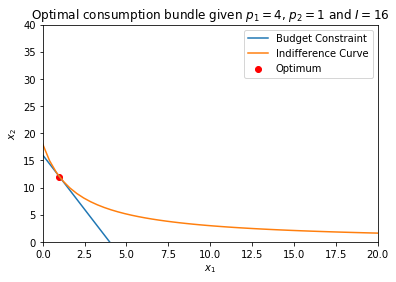

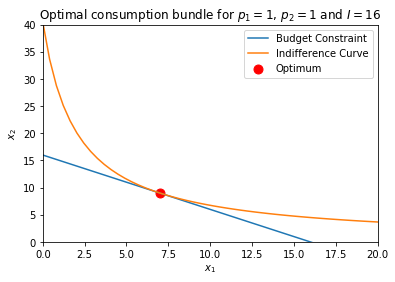

In [27]:
#Indifference curves and budget constraint in terms of x2
def budget(x1,I,p1,p2):
    return (I-p1*x1)/p2

def indiff(x1,u,p1,p2):
    return u/(x1+2)
#Plot indifference curve, budget constraint and optimum for p1=4 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,4,1),label='Budget Constraint') 
ax.plot(x1_vec,indiff(x1_vec,36,4,1),label='Indifference Curve')
ax.scatter(x1func(4,1,16),x2func(4,1,16),u(x1func(4,1,16),x2func(4,1,16)),color='red',label='Optimum')
plt.xlim(0, 20)
plt.ylim(0, 40)

#Title & labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Optimal consumption bundle given $p_1 = 4$, $p_2 = 1$ and $I = 16$')
ax.legend();

#Plot indifference curve, budget constraint and optimum for p1=1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,1,1),label='Budget Constraint')
ax.plot(x1_vec,indiff(x1_vec,81,1,1),label='Indifference Curve')
ax.scatter(x1func(1,1,16),x2func(1,1,16),u(x1func(1,1,16),x2func(1,1,16)),color='red',label='Optimum')
plt.xlim(0, 20)
plt.ylim(0, 40)


#Title & labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Optimal consumption bundle for $p_1=1$, $p_2 = 1$ and $I = 16$')
ax.legend();


# Evt. lav illustrationer med en FloatSlider. 

In [85]:
#Her laves functionen til figuren 
def interactive_figure(x1,I,p1,p2):
    def budget(x1,I,p1,p2):
        return (I-p1*x1)/p2
    def indiff(x1,u,p1,p2):
        return u/(x1+2)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x1_vec,budget(x1_vec,I,p1,p2),label='Budget Constraint') 
    ax.plot(x1_vec,indiff(x1_vec,u(x1func(p1,p2,I),x2func(p1,p2,I)),p1,p2),label='Indifference Curve')
    ax.scatter(x1func(p1,p2,I),x2func(p1,p2,I),u(x1func(p1,p2,I),x2func(p1,p2,I)),color='red',label=f'Optimum ({x1func(p1,p2,I):.1f},{x2func(p1,p2,I):.1f})')
    plt.xlim(0, 20)
    plt.ylim(0, 40)

    #Title & labels
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.title(f'Optimal consumption bundle given $p_1$={p1:.1f}, $p_2$={p2:.1f} and $I$={I}. \n Resulting in $x_1$={x1func(p1,p2,I):.2f}, $x_2$={x2func(p1,p2,I):.2f} with utility {u(x1func(p1,p2,I),x2func(p1,p2,I)):.2f}')
    ax.legend();

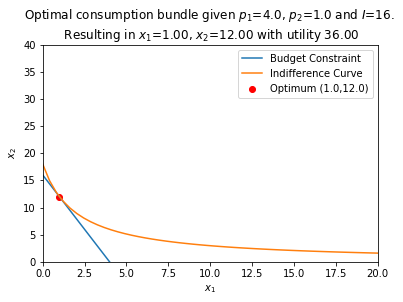

In [86]:
#Eksempel med p1=4 for test
interactive_figure(x1_vec,16,4,1)

In [87]:
#Her laves den som widget med float for p1
widgets.interact(interactive_figure,
    x1=widgets.fixed(x1_vec),
    I=widgets.fixed(16),
    p1=widgets.FloatSlider(description="p_1", min=0.1, max=5, step=0.05, value=4),
    p2=widgets.fixed(p2)
);

interactive(children=(FloatSlider(value=4.0, description='p_1', max=5.0, min=0.1, step=0.05), Output()), _dom_…

In [88]:
#Her med både p1, p2 og I!
widgets.interact(interactive_figure,
    x1=widgets.fixed(x1_vec),
    I=widgets.FloatSlider(description="I", min=1, max=30, step=0.5, value=16),
    p1=widgets.FloatSlider(description="p_1", min=0.1, max=8, step=0.05, value=4),
    p2=widgets.FloatSlider(description="p_2", min=0.1, max=8, step=0.05, value=1),
);

interactive(children=(FloatSlider(value=16.0, description='I', max=30.0, min=1.0, step=0.5), FloatSlider(value…

# Numerical approach

In [72]:
#Find optimal consumption
I = 16
p1 = 1
p2 = 1

def u_new(x1,x2):
    return x1*x2 + 2 * x2

#Negative sign to use minimzer
def func(x1,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_new(x1,x2)

#Solve
solution = optimize.minimize_scalar(
    func,method='bounded',
    bounds=(0,I/p2),args=(I,p1,p2))

x1 = solution.x
x2 = (I-p1*x1)/p2
u_func = u_new(x1,x2)

print(f'x1 = {x1:.1f}')
print(f'x2 = {x2:.1f}')
print(f'u  = {u_func:.1f}')
print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.2f}')

x1 = 7.0
x2 = 9.0
u  = 81.0
I-p1*x1-p2*x2 = 0.00


Same result. 

# Social planner

Max social planner problem tænker jeg. Find MRS. End op med at plotte Edgeworth box. 

# Conclusion